# Class Notes - Decision Trees and Random Forests

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head(10)

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15
5   absent    1       2     16
6   absent   61       2     17
7   absent   37       3     16
8   absent  113       2     16
9  present   59       6     12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


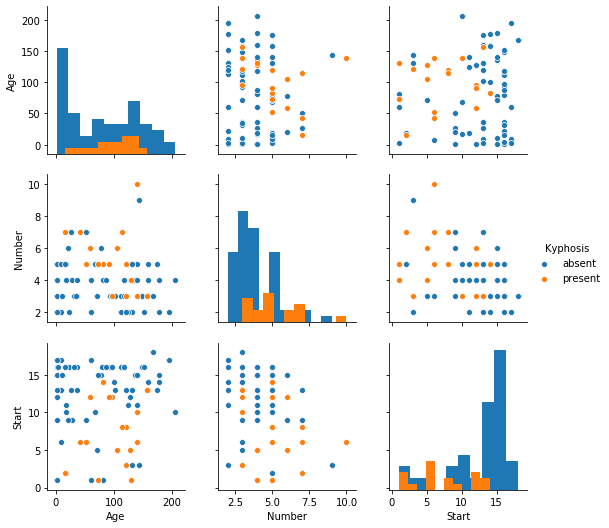

In [10]:
sns.pairplot(df, hue='Kyphosis',diag_kind= 'hist')

In [11]:
from sklearn.model_selection import train_test_split 

In [15]:
X = df.drop('Kyphosis', axis =1)
y = df['Kyphosis']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [17]:
# Using Decision Tree to create a machine learn model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
pred = dtree.predict(x_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,pred))



              precision    recall  f1-score   support

      absent       0.88      0.75      0.81        20
     present       0.38      0.60      0.46         5

    accuracy                           0.72        25
   macro avg       0.63      0.68      0.64        25
weighted avg       0.78      0.72      0.74        25



In [22]:
print(confusion_matrix(y_test,pred))

[[15  5]
 [ 2  3]]


In [26]:
# Using a Random Forest to create a machine learning model
from sklearn.ensemble import RandomForestClassifier

rndforest = RandomForestClassifier(n_estimators = 200)

# n_estimators defines the number of decision trees created for this random forest

In [27]:
rndforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
pred_rndforest = rndforest.predict(x_test)

In [29]:

print(classification_report(y_test,pred_rndforest))
print('\n')
print(confusion_matrix(y_test,pred_rndforest))

              precision    recall  f1-score   support

      absent       0.85      0.85      0.85        20
     present       0.40      0.40      0.40         5

    accuracy                           0.76        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.76      0.76      0.76        25



[[17  3]
 [ 3  2]]
